In [2]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [72]:
df = pd.read_csv('Preproccessed_Data.csv')

In [96]:
df = df.drop('state', axis=1)

In [73]:
df.head(1)

,bathrooms,bedrooms,pets_allowed,price,square_feet,state
0,1.0,0.0,0,790,101,DC


In [98]:
X = df.drop('pets_allowed', axis = 1)
y = df['pets_allowed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [99]:
regression = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [100]:
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [101]:
regression.score(X_test, y_test)

0.5785

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.41442786069651744,
   np.float64(0.021536853944235507)),
  ('0', '1'): (0.0,
   np.float64(0.024859113080448133),
   0.41442786069651744,
   np.float64(0.9751408869195519)),
  ('1', '0'): (0.4194029850746269,
   np.float64(0.0),
   0.5805970149253732,
   np.float64(0.023913433371196273)),
  ('1', '1'): (0.4194029850746269,
   np.float64(0.0272356925074089),
   0.5805970149253732,
   np.float64(0.9727643074925912))})

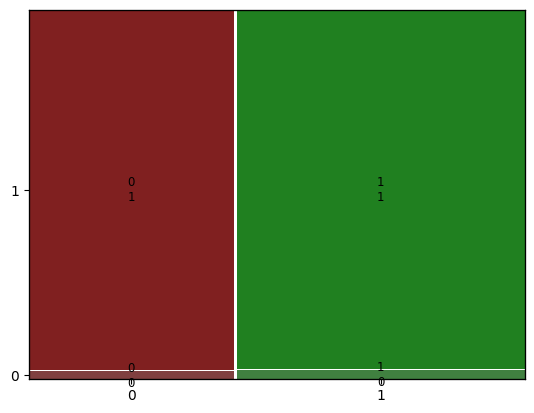

In [102]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

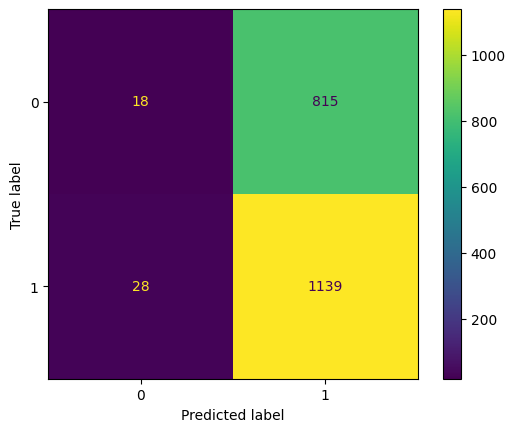

In [103]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

In [104]:
def pre(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    if calc_type == "p":
        value = tp / (tp + fp)
        return value
    elif calc_type == "r":
        value = tp / (tp + fn) 
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [106]:
pre("p", 1139, 18, 28, 815)

0.976006855184233

In [138]:
pre("r", 1139, 18, 28, 815)

0.582906857727738

In [109]:
df2 = pd.read_csv('Preproccessed_DataYesNo.csv')

In [111]:
df2['square_feet'] = df2.drop(df2[df2['square_feet'] == 40000].index, inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

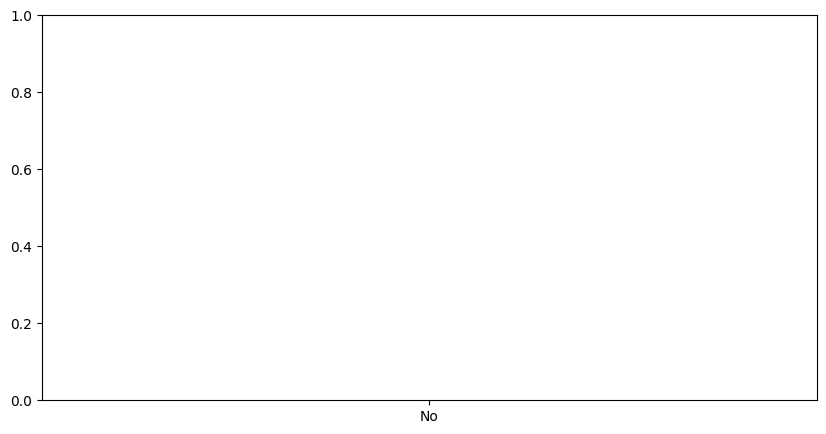

In [112]:
pa = df2['pets_allowed']
br = df2['square_feet']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(pa, br, color ='red', 
        width = 0.4)

plt.xlabel("Pets Allowed")
plt.ylabel("Square Feet")
plt.title("Pets Allowed based on Price")
plt.show()

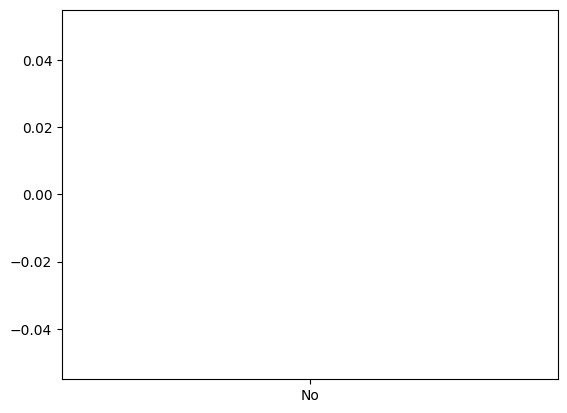

In [113]:
plt.plot(df2["pets_allowed"],df2["square_feet"],'*')

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

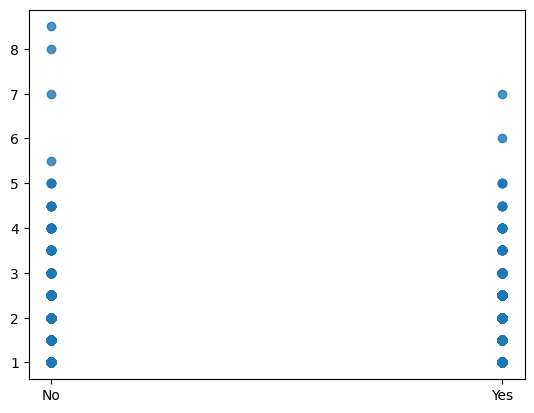

In [137]:
import seaborn as sns

x = df2['pets_allowed']
y = df2['bathrooms']

sns.regplot(x=x, y=y)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Regression Plot')
plt.show()

In [85]:
agg_class = dfsf.groupby("Majors").count()
agg_class.plot(kind="pie", y = 'Timestamp')
#Showing a pie chart of class majors, the portions of each major. 

TypeError: no numeric data to plot